# Task 1: Exploratory Data Analysis (EDA)

Step 1: Load dataset & exploration

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 
df = pd.read_csv("wine.csv")

# Show basic info
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())

# Display first 5 rows
df.head()


Shape of dataset: (178, 14)

Columns: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']

Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Step 2: Feature distributions

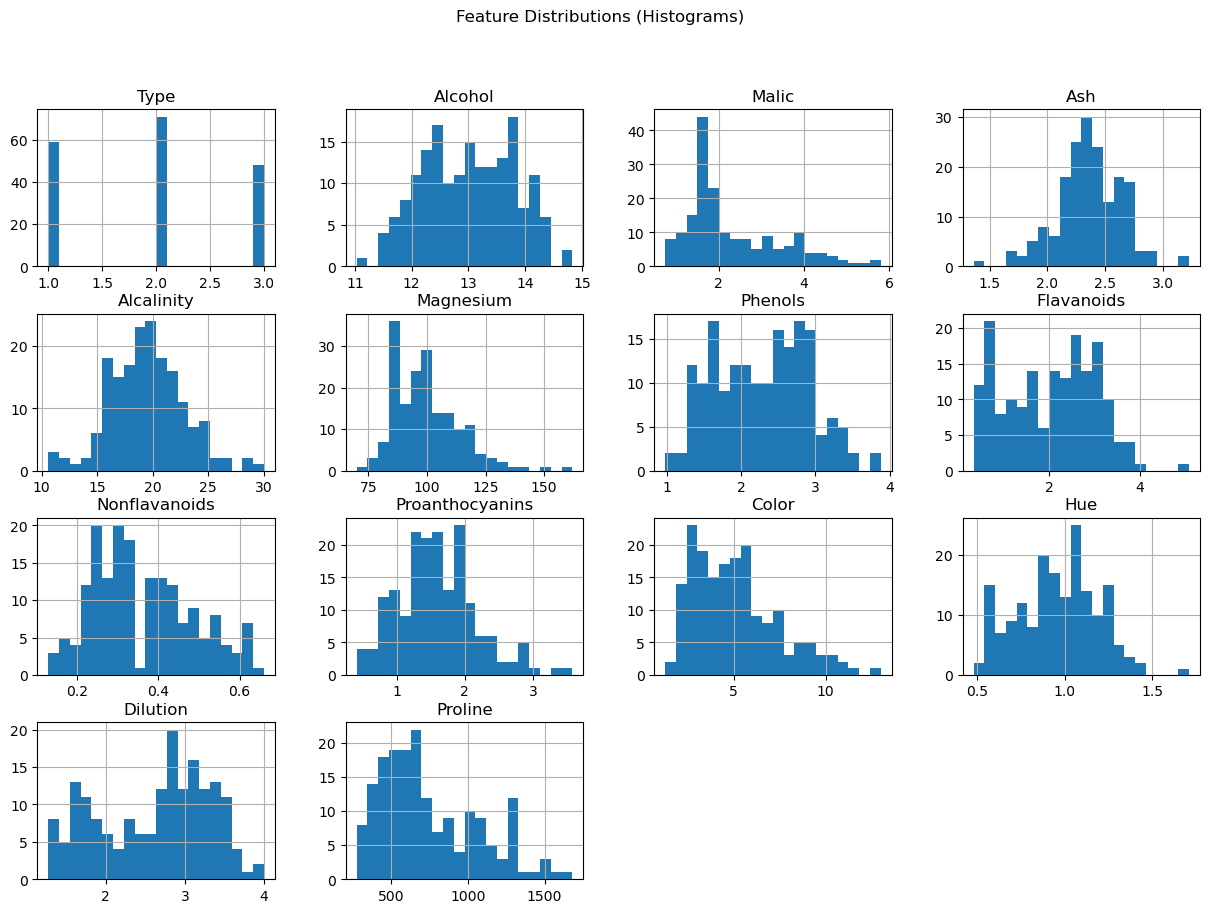

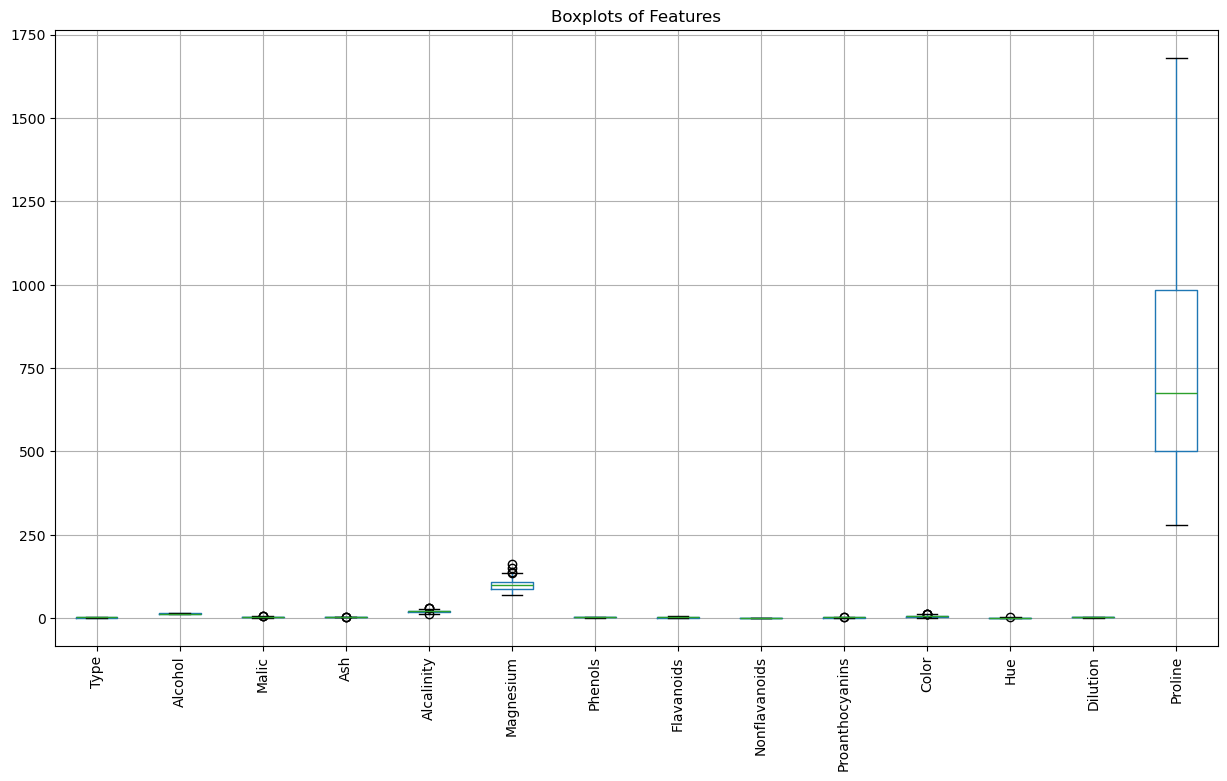

In [15]:
# Histograms for all features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions (Histograms)")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title("Boxplots of Features")
plt.xticks(rotation=90)
plt.show()


Step 3: Correlation analysis

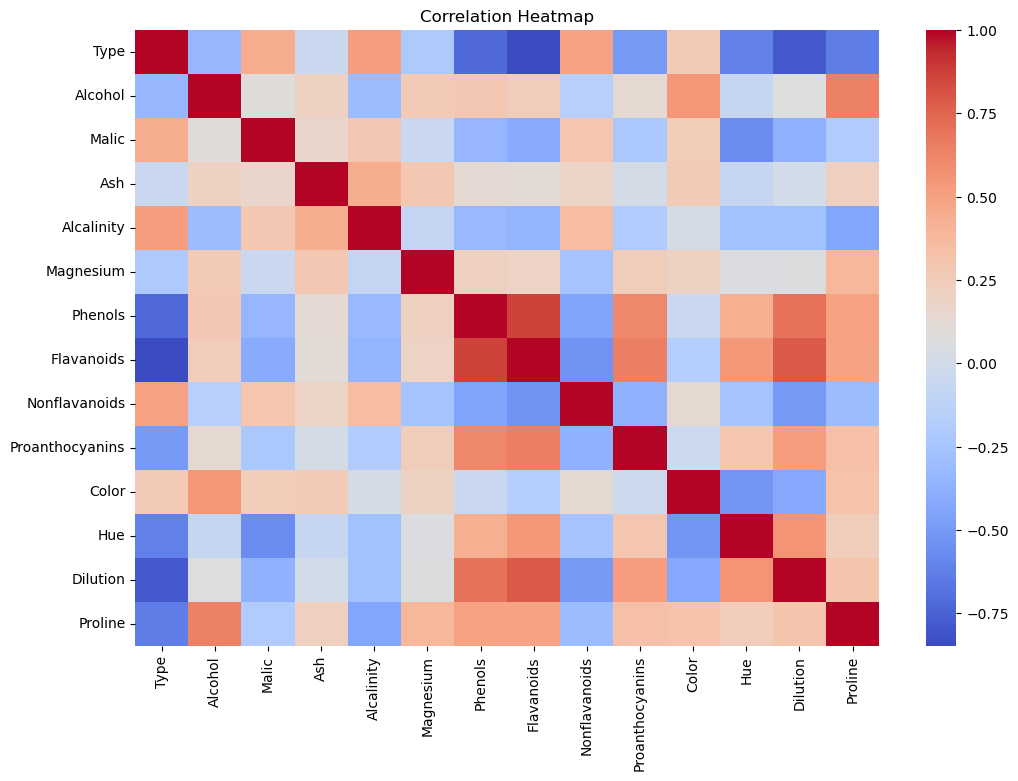

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Task 2: Dimensionality Reduction with PCA

Standardize and Apply PCA

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features 
X = df.drop(columns=["Wine"]) if "Wine" in df.columns else df.copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)

Scree plot & explained variance

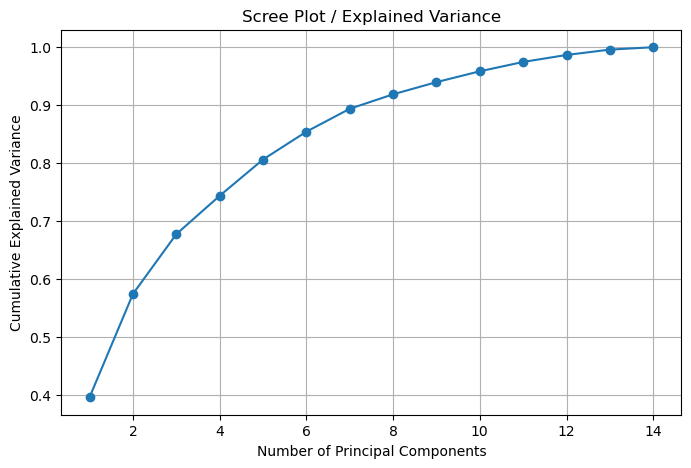

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot / Explained Variance")
plt.grid()
plt.show()

Transform dataset with chosen PCs

In [19]:
pca_final = PCA(n_components=2)   # can change to 3 if needed
X_pca_final = pca_final.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("PCA reduced shape:", X_pca_final.shape)

Original shape: (178, 14)
PCA reduced shape: (178, 2)


# Task 3: Clustering with Original Data

K- means

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Run K-Means with 3 clustes
kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_orig = kmeans_orig.fit_predict(X_scaled)

# Evaluation metrics
sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)

print(f"Silhouette Score (Original Data): {sil_orig:.3f}")
print(f"Davies-Bouldin Index (Original Data): {db_orig:.3f}")

Silhouette Score (Original Data): 0.308
Davies-Bouldin Index (Original Data): 1.316


c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 Visualize clusters 

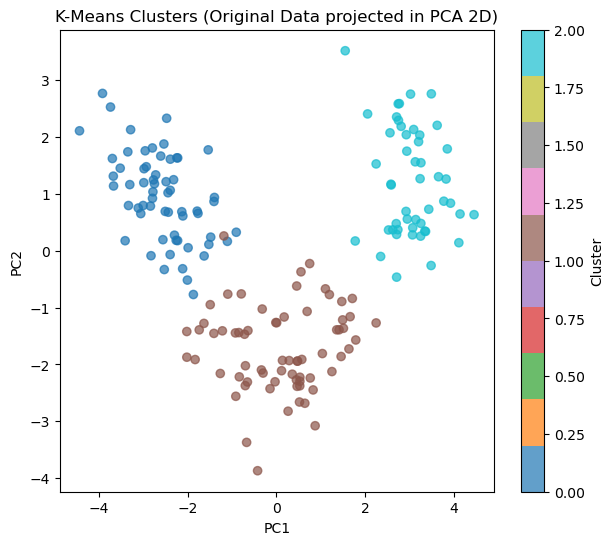

In [21]:
plt.figure(figsize=(7,6))
plt.scatter(X_pca_final[:,0], X_pca_final[:,1], c=labels_orig, cmap="tab10", alpha=0.7)
plt.title("K-Means Clusters (Original Data projected in PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

# Task 4: Clustering with PCA Data

K-Means on PCA Data

In [22]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_final)

# Evaluation metrics
sil_pca = silhouette_score(X_pca_final, labels_pca)
db_pca = davies_bouldin_score(X_pca_final, labels_pca)

print(f"Silhouette Score (PCA Data): {sil_pca:.3f}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca:.3f}")

Silhouette Score (PCA Data): 0.602
Davies-Bouldin Index (PCA Data): 0.540


c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualization of Clusters (PCA Data)

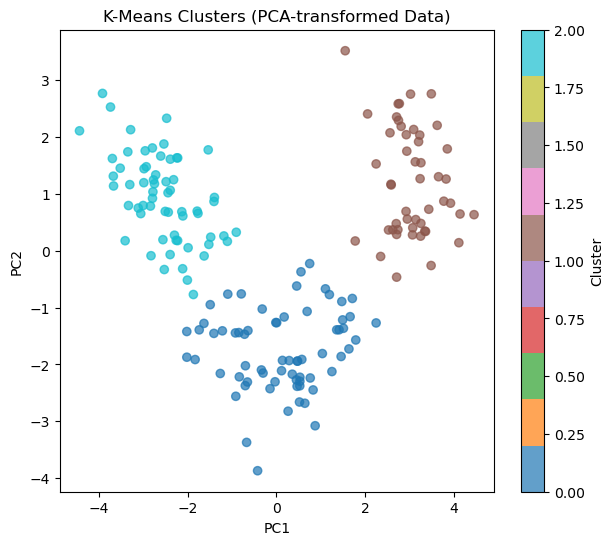

In [23]:
plt.figure(figsize=(7,6))
plt.scatter(X_pca_final[:,0], X_pca_final[:,1], c=labels_pca, cmap="tab10", alpha=0.7)
plt.title("K-Means Clusters (PCA-transformed Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

# Task 5: Comparison and Analysis
Compare Results

In [24]:

print(f"Silhouette (Original Data): {sil_orig:.3f}")
print(f"Davies-Bouldin (Original Data): {db_orig:.3f}")
print(f"Silhouette (PCA Data): {sil_pca:.3f}")
print(f"Davies-Bouldin (PCA Data): {db_pca:.3f}")

Silhouette (Original Data): 0.308
Davies-Bouldin (Original Data): 1.316
Silhouette (PCA Data): 0.602
Davies-Bouldin (PCA Data): 0.540


# Conclusion & Insights

## Key Findings
- **EDA** showed feature distributions and strong correlations among chemical properties.
- **PCA** reduced dimensionality from many features to just 2, while retaining most variance.
- **Clustering on Original Data** achieved reasonable separation, but results are high-dimensional.
- **Clustering on PCA Data** gave similar performance, easier visualization, and faster computation.

## Impact of PCA
- PCA simplified the dataset while preserving structure.
- PCA helped us visualize clusters in 2D clearly.
- Slight trade-off: small loss of information compared to original features.

## Recommendations
- Use **PCA + Clustering** when dataset has many correlated features.
- Use **Original Data Clustering** when interpretability of features is important.
- In practice, combining both (PCA for visualization, clustering on original for accuracy) works best.
